In [34]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [35]:
df = pd.read_csv('bank.csv')

In [36]:
df.head(20)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0/40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1/50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0/30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0/60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8/90,3,0,1,0,0,0,0


In [37]:
df.drop(columns=['ID', 'ZIP Code'], inplace=True)
df['CCAvg'] = df['CCAvg'].str.replace('/', '.')
df['CCAvg'] = df['CCAvg'].astype(float)*12

In [38]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,19.2,1,0,0,1,0,0,0
1,45,19,34,3,18.0,1,0,0,1,0,0,0
2,39,15,11,1,12.0,1,0,0,0,0,0,0
3,35,9,100,1,32.4,2,0,0,0,0,0,0
4,35,8,45,4,12.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,22.8,3,0,0,0,0,1,0
4996,30,4,15,4,4.8,1,85,0,0,0,1,0
4997,63,39,24,2,3.6,3,0,0,0,0,0,0
4998,65,40,49,3,6.0,2,0,0,0,0,1,0


In [39]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,19.2,1,0,0,1,0,0,0
1,45,19,34,3,18.0,1,0,0,1,0,0,0
2,39,15,11,1,12.0,1,0,0,0,0,0,0
3,35,9,100,1,32.4,2,0,0,0,0,0,0
4,35,8,45,4,12.0,2,0,0,0,0,0,1


In [40]:
x = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']


In [41]:
df['Experience'] = abs(df['Experience'])

In [42]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [44]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Income                0.130660
CCAvg                 0.084918
CD Account            0.035975
Mortgage              0.017326
Education             0.009462
Online                0.007317
Experience            0.005779
CreditCard            0.001316
Family                0.000977
Age                   0.000000
Securities Account    0.000000
dtype: float64

In [45]:
best_top_features = SelectKBest(mutual_info_classif, k=5)
best_top_features.fit(X_train, y_train)
X_train.columns[best_top_features.get_support()]

Index(['Income', 'CCAvg', 'Education', 'Mortgage', 'CD Account'], dtype='object')

In [46]:
ans = []
col = ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage','CD Account']
for i in X_train.columns:
    if i not in col:
        ans.append(i)


ans



['Experience', 'Securities Account', 'Online', 'CreditCard']

In [ ]:
Online                0.007317
Experience            0.005779
CreditCard            0.001316
Family                0.000977
Age                   0.000000
Securities Account    0.000000

In [61]:
X_train= X_train.drop(columns=['Experience','Age', 'Family', 'Securities Account', 'Online', 'CreditCard'])
X_test = X_test.drop(columns=['Experience','Age', 'Family', 'Securities Account', 'Online', 'CreditCard'])


In [62]:
scores=[]
for i in range(1, 15):
    knn_testing = KNeighborsClassifier(n_neighbors=i)
    knn_testing.fit(X_train, y_train)
    y_pred_value=knn_testing.predict(X_test)
    acc_testing= accuracy_score(y_test, y_pred_value)
    scores.append(acc_testing)
    

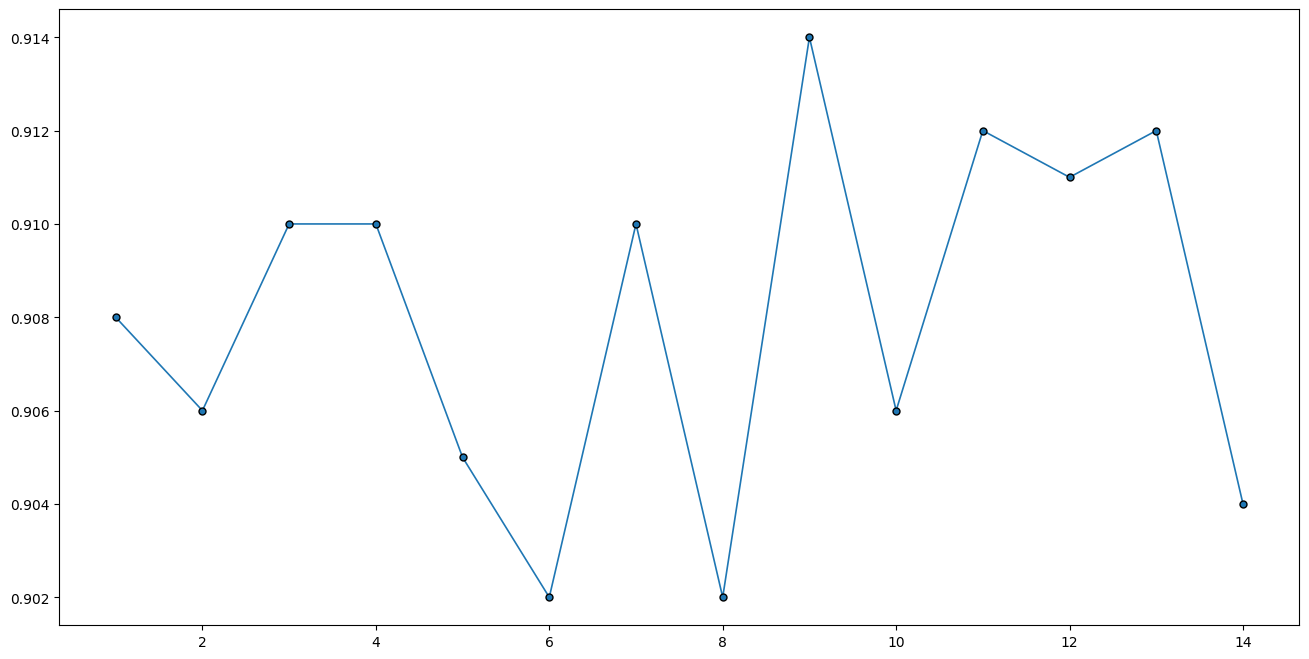

In [63]:
plt.figure(figsize=(16, 8))
plt.plot(range(1, 15), scores,linewidth=1.2, linestyle='-',marker='o', markersize=5, markeredgecolor='black')

plt.show()

In [64]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy of Knn: {acc_knn:.2f}")


Accuracy of Knn: 0.91


In [65]:
X_train

,Income,CCAvg,Education,Mortgage,CD Account
4227,111,45.6,1,0,0
4676,68,25.2,1,0,0
800,173,72.0,1,0,0
3671,18,4.8,3,0,0
4193,31,2.4,1,0,0
...,...,...,...,...,...
4426,140,55.2,1,0,0
466,13,10.8,3,0,0
3092,113,4.8,1,325,0
3772,152,36.0,1,0,0


['Experience', 'Income', 'CCAvg', 'Education', 'Mortgage', 'CD Account',
       'CreditCard'],

In [74]:
import pickle
import numpy as np
with open('tree_model.pkl', 'rb') as f:
    loaded_knn = pickle.load(f)
new_data = np.array([[180, 106, 1, 0, 0]])
predicted = loaded_knn.predict(new_data)
predicted

/home/raman/Downloads/Raman-main/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [69]:
X_train

,Income,CCAvg,Education,Mortgage,CD Account
4227,111,45.6,1,0,0
4676,68,25.2,1,0,0
800,173,72.0,1,0,0
3671,18,4.8,3,0,0
4193,31,2.4,1,0,0
...,...,...,...,...,...
4426,140,55.2,1,0,0
466,13,10.8,3,0,0
3092,113,4.8,1,325,0
3772,152,36.0,1,0,0


In [66]:
parameters={
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, None]
}
tunning_tree = DecisionTreeClassifier()
cv = GridSearchCV(tunning_tree, param_grid=parameters, cv=5)
cv.fit(X_train, y_train)
print(f'The best parameters are: {cv.best_params_}')

best_tree_model= cv.best_estimator_
y_pred_tree_val = best_tree_model.predict(X_test)
accuracy_tree_model = accuracy_score(y_test, y_pred_tree_val)
print(f"Accuracy score of Decision Tree: {accuracy_tree_model}")


The best parameters are: {'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
Accuracy score of Decision Tree: 0.974


In [67]:
import pickle
with open('tree_model.pkl', 'wb') as f:
    pickle.dump(best_tree_model, f)

In [54]:
# param_grid = {
#     'n_estimators':[50, 90, 120, 150, 180],
#     'max_depth':[1, 2, 3, 5, 6],
#     'min_samples_leaf':[1, 2, 3, 4, 5],
#     'criterion':['entropy', 'gini']
# }
# rfc = RandomForestClassifier()

# param_grid = {
#     'n_estimators': [50, 100, 200],  
#     'learning_rate': [0.01, 0.1, 0.2],  
#     'max_depth': [3, 4, 5], 
#     'min_samples_split': [2, 5, 10], 
#     'min_samples_leaf': [1, 2, 5] 
# }

# grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, 
#                            cv=5, scoring='accuracy')
# rfc.fit(X_train, y_train)


# print("Best Hyperparameters:", grid_search_rfc.best_params_)

# best_model = grid_search_rfc
# y_pred = best_model.predict(X_test)

# print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))


In [55]:
# base_estimator = DecisionTreeClassifier()

# adaboost = AdaBoostClassifier(estimator=base_estimator)

# param_grid = {
#     'n_estimators': [50, 100, 120, 150],
#     'learning_rate': [0.01, 0.1, 0.5, 1],
#     'estimator__max_depth': [1, 2, 3, 4, 5] 
# }


# grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
# grid_search.fit(X_train, y_train)


# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)
# print("Test Accuracy:", test_accuracy)


In [56]:
# base_estimator = DecisionTreeClassifier()

# adaboost = AdaBoostClassifier(estimator=base_estimator)

# param_grid = {
#     'n_estimators': [50, 100, 120, 150],
#     'learning_rate': [0.01, 0.1, 0.5, 1],
#     'estimator__max_depth': [1, 2, 3, 4, 5] 
# }


# grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
# grid_search.fit(X_train, y_train)


# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_train)
# test_accuracy = accuracy_score(y_train, y_pred)

# print("Test Accuracy:", test_accuracy)



In [57]:
# gb_clf = GradientBoostingClassifier()

# param_grid = {
#     'n_estimators': [50, 100, 200],  
#     'learning_rate': [0.01, 0.1, 0.2],  
#     'max_depth': [3, 4, 5], 
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5] 
# }

# grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid, 
#                            cv=5, scoring='accuracy')

# grid_search_gb.fit(X_train, y_train)


# print("Best Hyperparameters:", grid_search_gb.best_params_)


# best_model = grid_search_gb.best_estimator_
